In [2]:
import sys
sys.path.append("/Users/daijin/jhu102/ML for medical applications/project/code/") # the path of features.py
%load_ext autoreload
%autoreload 2
from features import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

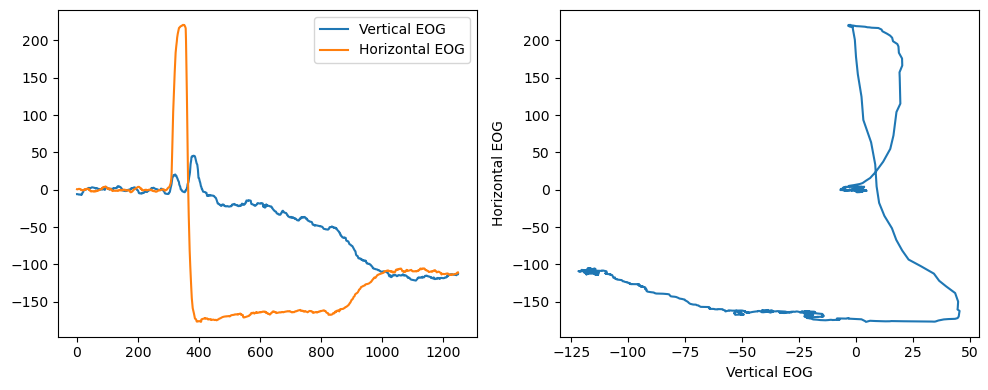

In [4]:
path_data = '/Users/daijin/jhu102/ML for medical applications/project/data/isolated/001/isolated_strokes/EOG_001_01_001.csv'
eog = pd.read_csv(path_data)

plt.figure(1, figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(eog.iloc[:, 0], label='Vertical EOG')
plt.plot(eog.iloc[:, 1], label='Horizontal EOG')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(eog.iloc[:, 0], eog.iloc[:, 1])
plt.xlabel('Vertical EOG')
plt.ylabel('Horizontal EOG')
plt.tight_layout()
plt.show()

# EMG_features(data, segments_num, function_list=[])

***input***  
data(size: time, channels/numpy array): EOG signal which need to be extracted features. 

segments_num(int): how many segments wanted to split in time domain

function_list(list): functions list of feature extraction functions. `[[f1], [f3, parameter], ...]`

***output***  
EOG features (size: channels, segments_num, features)

In [5]:
path_data = '/Users/daijin/jhu102/ML for medical applications/project/data/isolated/001/isolated_strokes/EOG_001_01_001.csv'

data = pd.read_csv(path_data)
data = data.to_numpy()
segments_num = 2
mfcc_para_dict = {'sr': 1000, 'n_mfcc': 10, 'lifter':12, 'n_fft': 1000, 'hop_length': 500, 'fmin': 2, 'fmax':100}
function_list = [[var], [mean], [std], [skew], [kurtosis],[std_mean],\
    [mav], [mav1], [mav2], [rms], [wl], [wa], [zc], [ssc], [AR_coef, 4], \
        [he, 20], [auto_cor, 10], [cc],\
            [mfcc_feature, mfcc_para_dict], [mfcc_feature_mean_std, mfcc_para_dict], \
                [Shapiro], [kstest]]

data_features = EMG_features(data, segments_num, function_list)

print(data_features.shape)

function 0
function 1
function 2
function 3
function 4
function 5
function 6
function 7
function 8
function 9
function 10
function 11
function 12
function 13
function 14
function 15
function 16
function 17
function 18
function 19
function 20
function 21
(2, 2, 54)


/opt/anaconda3/envs/python39/lib/python3.9/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1000 is too large for input signal of length=3
  warnings.warn(


# features functions

***intput*** data(time, segments), parameter(size and type depends on different functions)

***output*** (segments, 1) or (segments, n) 

Functions in this part are called in EMG_features.

## Most basic statistic features

No extra parameter is needed in this part.

var：方差

mean：均值

std：标准差

skew：偏度

kurtosis：峰度

std_mean：标准差/均值

## Signal waveform features

mav: （no parameter) 

mean absolute value. $\sum_{i=1}^n |x_i|/n$


mav1:（no parameter) 

![avatar](mav1.png)


mav2: (no parameter) 

![avatar](mav1.png)


rms:（no parameter) 

![avatar](rms.png)


wl: (no parameter)

![avatar](wl.png)


wa: (parameter(int): T in the following equation, default:500)

![avatar](wa.png)


zc: (no parameter)

![avatar](zc.png)


ssc: (no parameter)

![avatar](ssc.png)


AR_coef: (parameter(int): the order of the linear regression model in the following equation, default: 4)

![avatar](AR_coef.png)


## Self similarity features

he: (parameter(int) K in the following equation)
    
![avatar](he.png)

auto_cor: (parameter(int) lag in the following equation)

correlation between x(t) and x(t-lag)

cc

![avatar](cc.png)

# MFCC features

mfcc_feature: (parameter(dictionary): the parameter dictionary of MFCC, sr(sample rate) is the required one.)

mfcc_feature_mean_std: (parameter(dictionary): the parameter dictionary of MFCC, sr(sample rate) is the required one.)

calculate the mead and standard deviation of each frequency component in MFCC.




# 正态性检验

The returned value is the p value of the following test.

Shapiro:(no parameter) 

kstest:(no parameter)